<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/C1_%E7%94%A8Python%E7%90%86%E8%B2%A1_%E6%89%93%E9%80%A0%E5%B0%8F%E8%B3%87%E6%97%8F%E9%81%B8%E8%82%A1%E7%AD%96%E7%95%A5/L34_%E6%8A%80%E8%A1%93%E5%9E%8B%E6%85%8B%E4%BA%8C%E6%AC%A1%E5%89%B5%E9%AB%98%E9%81%B8%E8%82%A1%E7%AD%96%E7%95%A5_new_high.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finlab > log.txt

In [2]:
from finlab import data

close = data.get('price:收盤價')

輸入成功!


<Axes: >

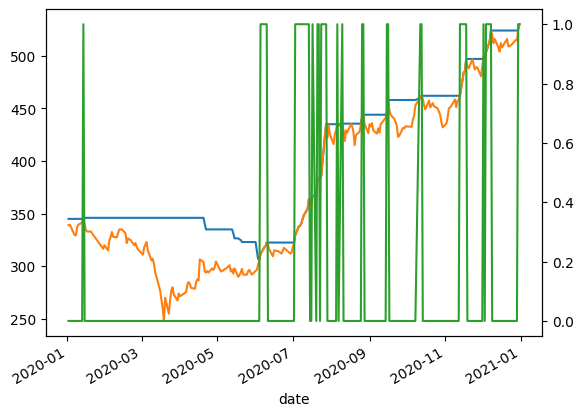

In [11]:
close_max = close.rolling(60).max()
new_high = close == close_max

close_max['2330']['2020'].plot()
close['2330']['2020'].plot()
new_high['2330']['2020'].astype(int).plot(secondary_y=True)

<Axes: xlabel='date'>

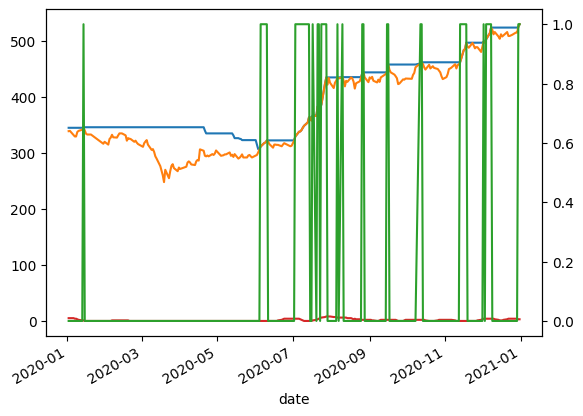

In [13]:
close_max = close.rolling(60).max()
new_high = close == close_max


def signal_count_between_time(signal, dt1, dt2):
  return signal.rolling(dt1 - dt2).sum().shift(dt2)

result = signal_count_between_time(new_high, 20, 10)

close_max['2330']['2020'].plot()
close['2330']['2020'].plot()
new_high['2330']['2020'].astype(int).plot(secondary_y=True)
result['2330']['2020'].plot()

In [14]:
dA = 55
dB = 30
dC = 5
cond1 = signal_count_between_time(new_high, dA, dB) > 0
cond2 = signal_count_between_time(new_high, dB, dC) == 0
cond3 = new_high

rev = data.get('monthly_revenue:當月營收')
cond4 = rev.average(3) > rev.average(12)

vol = data.get('price:成交股數')
cond5 = vol.average(5) > vol.average(20)

entries = cond1 & cond2 & cond3 & cond4 & cond5

exits = close < close.average(20)


position = entries.hold_until(exits)
position

from finlab import backtest

backtest.sim(position, resample="W", name='二次創新高策略')